In [1]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np

def set_custom_plot_style():
    px.defaults.template = 'seaborn'
    px.defaults.width = 1000
    px.defaults.height = 300
    px.defaults.color_continuous_scale = px.colors.sequential.Plasma_r # Plasma, Blackbody
    px.defaults.color_discrete_sequence = px.colors.qualitative.T10 #  check there fig = px.colors.qualitative.swatches() fig.show()
    
set_custom_plot_style()

In [2]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
fig = px.histogram(df, x="day", y="total_bill", color="sex",
            title="Receipts by Payer",
            width=600, height=400,
            labels={"sex": "Payer Gender",  "day": "Day of Week", "total_bill": "Receipts"},
            category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "sex": ["Male", "Female"]},
            # color_discrete_map={"Male": "RebeccaPurple", "Female": "MediumPurple"},
            template="seaborn"
            )
fig.update_yaxes(tickcolor = "blue", tickprefix="$", showgrid=True)# the y-axis is in dollars
fig.update_layout(font={"family":"Open Sans", 'size':12}, 
                  title_font={"family":"Open Sans", 'size':22, 'color': 'Navy'},
                  title_automargin = False,
                  title_xanchor = 'center',
                  margin=dict(t=90, b=20, l=10, r=50)
                  
                 
                #legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center")
                  )
fig.add_shape(type="line", line_color="darkgray", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=950, y1=950, yref="y") # add a horizontal "target" line

fig.add_annotation( text="below target!", x="Fri", y=400, arrowhead=1, showarrow=True) # add a text callout with arrow
#fig.update_layout(title_font=dict(size=20), font={"family":"Open Sans", 'size':12})

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=1)
fig.show()

In [4]:
#set 1
# fig = px.histogram(df, x="day", y="total_bill", width=800)
# fig.show()
#set up 2
fig = px.histogram(df, x="day", y="total_bill", color="sex",
            title="Receipts by Payer",
            width=600, height=400,
            labels={"sex": "Payer Gender",  "day": "Day of Week", "total_bill": "Receipts"},
            category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "sex": ["Male", "Female"]},
            # color_discrete_map={"Male": "RebeccaPurple", "Female": "MediumPurple"},
            template="seaborn"
            )
fig.update_yaxes(tickcolor = "blue", tickprefix="$", showgrid=True)# the y-axis is in dollars
fig.update_layout(font={"family":"Open Sans", 'size':12}, 
                  title_font={"family":"Open Sans", 'size':22, 'color': 'Navy'},
                  title_automargin = False,
                  title_xanchor = 'center',
                  margin=dict(t=90, b=20, l=10, r=50)
                  
                 
                #legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center")
                  )
fig.add_shape(type="line", line_color="darkgray", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=950, y1=950, yref="y") # add a horizontal "target" line

fig.add_annotation( text="below target!", x="Fri", y=400, arrowhead=1, showarrow=True) # add a text callout with arrow
#fig.update_layout(title_font=dict(size=20), font={"family":"Open Sans", 'size':12})

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=1)
fig.show()

In [5]:
def format_title(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle: return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [6]:
df = px.data.gapminder()
df_2007 = df.query("year==2007")
df_2007.head()
df_2007.shape

(142, 8)

In [7]:
for col in df_2007.columns:
    nuniqueCount = df_2007[col].nunique()
    print(f"{col}: {nuniqueCount} unique values {df_2007[col].dtype}")



country: 142 unique values object
continent: 5 unique values object
year: 1 unique values int64
lifeExp: 142 unique values float64
pop: 142 unique values int64
gdpPercap: 142 unique values float64
iso_alpha: 141 unique values object
iso_num: 141 unique values int64


In [8]:
df = px.data.gapminder()
df_2007 = df.query("year==2007")
df_2007.head()
df_2007.shape
fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     size_max=60, height= 400, title=format_title("Animal Height/Length", "data collected at my local zoo during 2020"))
fig.update_traces(marker=dict(line=dict(width=1, color='black')),
                  selector=dict(mode='markers'))
fig.show()

In [9]:
fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     size_max=100, height= 400)
fig.update_traces(marker=dict(line=dict(width=1, color='black')),
                  selector=dict(mode='markers'))
fig.show()

In [10]:
df_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [11]:
# create dummy data

x = [i for i in range(1, 6)]
y = np.ceil(100 * np.random.rand(5)).astype(int)
s = np.ceil(30 * np.random.rand(5)).astype(int)
y1 = np.random.normal(size=1000)
y2 = np.random.normal(size=1000)

In [12]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add Dot plots
fig.add_trace(go.Scatter(y=df['Item_Visibility'], mode='markers', name="Dataset 1", marker=dict(color='blue')))
fig.add_trace(go.Scatter(y=df_test['Item_Visibility'], mode='markers', name="Dataset 2", marker=dict(color='orange')))

# Update layout
fig.update_layout(
    title=dict(text='Training Datasets Outliers', font=dict(family="Open Sans", size=24), x=0.5),
    xaxis=dict(title_text='Outliers', showgrid=False),
    yaxis=dict(title_text='Values', showgrid=False),
    width=900
)
fig.layout.template = 'seaborn'

# Show figure
fig.show()


KeyError: 'Item_Visibility'

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Sample data creation
np.random.seed(0)
df = pd.DataFrame({'Item_Visibility': np.random.rand(100), 'Item_Outlet_Sales': np.random.rand(100)})
df_test = pd.DataFrame({'Item_Visibility': np.random.rand(100), 'Item_Outlet_Sales': np.random.rand(100)})

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Item Visibility", "Item Outlet Sales"), column_widths=[0.7, 0.3])

# Add traces to the first subplot
fig.add_trace(go.Scatter(y=df['Item_Visibility'], mode='markers', name="Training", marker=dict(color='gray', size=4)), row=1, col=1)
fig.add_trace(go.Scatter(y=df_test['Item_Visibility'], mode='markers', name="Test", marker=dict(color='tomato', size=4)), row=1, col=1)

# Update layout for the first subplot
fig.update_xaxes(title_text='Outliers', showgrid=False, row=1, col=1)
fig.update_yaxes(title_text='Values', showgrid=False, row=1, col=1)

# Add traces to the second subplot
fig.add_trace(go.Scatter(y=df['Item_Outlet_Sales'], mode='markers', name="Dataset 1", marker=dict(color='gray')), row=1, col=2)

# Update layout for the second subplot
fig.update_xaxes(title_text='Outliers', showgrid=False, row=1, col=2)
fig.update_yaxes(showgrid=False, row=1, col=2)

# Update overall layout
fig.update_layout(
    title=dict(text='Training Datasets Outliers', font=dict(family="Open Sans", size=24), x=0.5),
    margin=dict(t=110, pad=25, l = 0),
    
    width=1100,
    template='simple_white'
)

# Show figure
fig.show()


In [14]:
import plotly.graph_objects as go
import plotly.express as px

# Load sample data
df = px.data.gapminder().query("continent == 'Asia'")

# Define custom font
my_font = dict(family='Arial', size=16, color='#333333')

# Create scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['gdpPercap'], y=df['lifeExp'], mode='markers', marker_color=df['pop'], hovertemplate='Country: %{hovertext}<br>GDP per capita: %{x:.2f}<br>Life expectancy: %{y:.2f}'))

# Customize layout and axes
fig.update_layout(
    title='Gapminder Dataset Scatter Plot',
    xaxis_title='GDP per capita',
    yaxis_title='Life expectancy',
    font=my_font
)

# Show plot
fig.show()


In [15]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [16]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [17]:
fig = make_subplots(rows=1, cols=1, column_widths=[1])
y=df['SalePrice']
fig.add_trace(go.Scatter(x = df['GrLivArea'], y=y, mode='markers', marker_size=df['OverallQual'] * 2, name='GrLivArea'), row=1, col=1)
fig.add_trace(go.Scatter(x = df['GarageArea'], y=y, mode='markers', marker_size=df['OverallQual']*2, name='GarageArea'), row=1, col=1)
fig.add_trace(go.Scatter(x = df['TotalBsmtSF'], y=y, mode='markers', marker_size=df['OverallQual']*2, name='TotalBsmtSF'), row=1, col=1)
fig.add_trace(go.Scatter(x = df['1stFlrSF'], y=y, mode='markers', marker_size=df['OverallQual']*2, name='1stFlrSF'), row=1, col=1)



fig.update_xaxes(showgrid=False, rangemode='nonnegative')
fig.update_yaxes(showgrid=False, rangemode='nonnegative')

# Define the layout settings in a dictionary
layout_settings = dict(
    font_family="Open Sans",
    title=dict(text='Training Datasets Outliers', font=dict(size=22, color='navy'), x=0.5),
    margin=dict(t=50, b=10, l=10, pad=0),
    width=1200, height=400,
    template='seaborn'
)

trace_settings = dict(
    marker_line_color='black',
    marker_line_width=1,
    opacity=1,
    showlegend=True
)

# Create a figure (fig) and apply the trace settings
fig.update_traces(**trace_settings)



# fig.update_layout(font_family="Open Sans",
#                   title=dict(text='Training Datasets Outliers', font=dict(size=22, color='navy'), x=0.5),
#                   margin=dict(t=50, b=10, l=10, pad=0), 
#                   width=1200, height=400,
#                   template='seaborn')

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=1, showlegend=True)

# Show figure
fig.show()

KeyError: 'SalePrice'

In [18]:
fig = make_subplots(rows=3, cols=2, column_widths=[0.55, 0.45])
y=df['SalePrice']
fig.add_trace(go.Scatter(x=df['GrLivArea'], y=y, mode='markers', 
                         marker=dict(size=df['OverallQual']*2, color=df['FullBath'], colorscale='Viridis'), 
                        name='GrLivArea'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['GarageArea'], y=y, mode='markers', 
                         marker=dict(size=df['OverallQual']*2, color=df['GarageArea']), 
                        name='GarageArea'), row=1, col=2)
fig.add_trace(go.Scatter(x=df['TotalBsmtSF'], y=y, mode='markers', marker=dict(size=df['TotRmsAbvGrd']*1.5), name='TotalBsmtSF'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['1stFlrSF'], y=y, mode='markers', marker=dict(size=df['TotRmsAbvGrd']*1.5), name='1stFlrSF'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['YearBuilt'], y=y, mode='markers', marker=dict(size=df['OverallQual']*1), name='YearBuilt'), row=2, col=2)
fig.add_trace(go.Scatter(x=df['YearRemodAdd'], y=y, mode='markers', marker=dict(size=df['OverallQual']*2), name='YearRemodAdd'), row=2, col=2)
fig.add_trace(go.Scatter(x=df['MasVnrArea'], y=y, mode='markers', marker=dict(size=df['Fireplaces']*10), name='MasVnrArea'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['EnclosedPorch'], y=y, mode='markers', marker=dict(size=df['KitchenAbvGr']*15), name='MasVnrArea'), row=3, col=2)
fig.update_xaxes(showgrid=False, rangemode='nonnegative')
fig.update_yaxes(showgrid=False, rangemode='nonnegative')


fig.update_layout(font_family="Open Sans",
                  title=dict(text='Training Datasets Outliers', font=dict(size=22, color='navy'), x=0.5),
                  margin=dict(t=50, b=10, l=10, pad=0), 
                  width=1200, height=800,
                  template='seaborn')

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=1, showlegend=False)

# Show figure
fig.show()

KeyError: 'SalePrice'

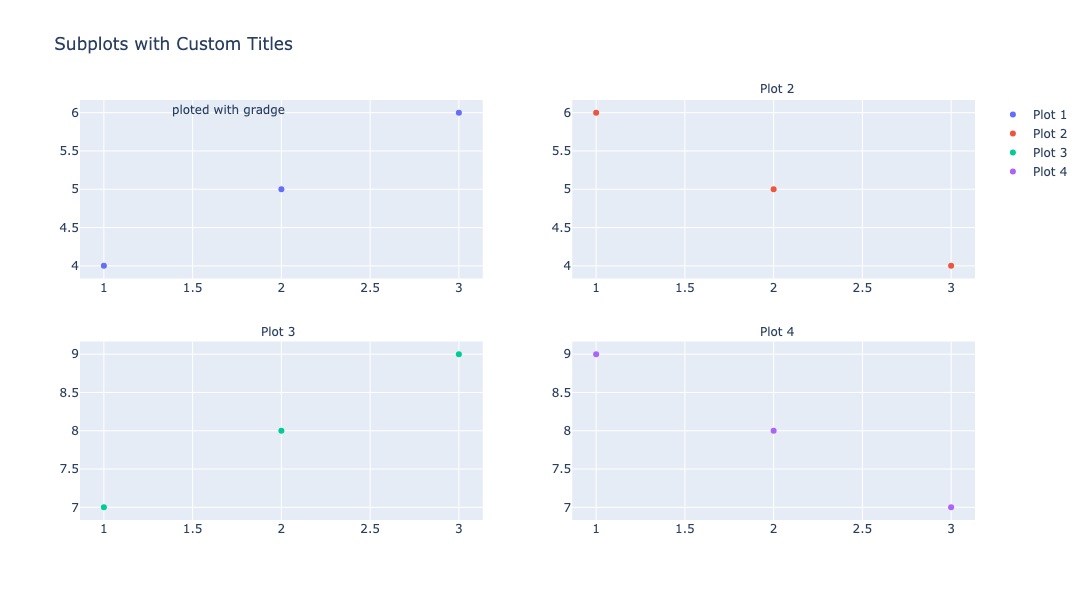

In [16]:
from plotly.subplots import make_subplots

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2)

# Add scatter plots to each subplot
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers', name='Plot 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[6, 5, 4], mode='markers', name='Plot 2'), row=1, col=2)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[7, 8, 9], mode='markers', name='Plot 3'), row=2, col=1)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[9, 8, 7], mode='markers', name='Plot 4'), row=2, col=2)

# Add annotations for subplot titles
annotations = [
    dict(text='ploted with gradge', x=0.1, y=1.00, xref='paper', yref='paper', showarrow=False),
    dict(text='Plot 2', x=0.8, y=1.05, xref='paper', yref='paper', showarrow=False),
    dict(text='Plot 3', x=0.2, y=0.45, xref='paper', yref='paper', showarrow=False),
    dict(text='Plot 4', x=0.8, y=0.45, xref='paper', yref='paper', showarrow=False)
]

fig.update_layout(annotations=annotations, title_text='Subplots with Custom Titles', height=600, width=600)

# Show plot
fig.show()


In [17]:
columns = filtered_corr_df['Feature'].tolist()
fig = make_subplots(rows=4, cols=3, column_widths=[0.4, 0.3, 0.3], vertical_spacing = 0.05, subplot_titles=columns)
y=df['SalePrice']
fig.add_trace(go.Scatter(x = df['OverallQual'], y=y, mode='markers', name='OverallQual'), row=1, col=1)
fig.add_trace(go.Scatter(x = df['GrLivArea'], y=y, mode='markers',  name='GrLivArea'), row=1, col=2)
fig.add_trace(go.Scatter(x = df['GarageCars'], y=y, mode='markers', name='GarageCars'), row=1, col=3)
fig.add_trace(go.Scatter(x = df['GarageArea'], y=y, mode='markers', name='OverallQual'), row=2, col=1)
fig.add_trace(go.Scatter(x = df['TotalBsmtSF'], y=y, mode='markers',  name='GrLivArea'), row=2, col=2)
fig.add_trace(go.Scatter(x = df['1stFlrSF'], y=y, mode='markers', name='GarageCars'), row=2, col=3)
fig.add_trace(go.Scatter(x = df['FullBath'], y=y, mode='markers', name='OverallQual'), row=3, col=1)
fig.add_trace(go.Scatter(x = df['TotRmsAbvGrd'], y=y, mode='markers', name='GrLivArea'), row=3, col=2)
fig.add_trace(go.Scatter(x = df['YearBuilt'], y=y, mode='markers', name='GarageCars'), row=3, col=3)
fig.add_trace(go.Scatter(x = df['YearRemodAdd'], y=y, mode='markers', name='OverallQual'), row=4, col=1)
fig.add_trace(go.Scatter(x = df['EnclosedPorch'], y=y, mode='markers', name='GrLivArea'), row=4, col=2)
fig.add_trace(go.Scatter(x = df['KitchenAbvGr'], y=y, mode='markers', name='GarageCars'), row=4, col=3)
fig.update_xaxes(showgrid=False, rangemode='nonnegative')
fig.update_yaxes(showgrid=False, rangemode='nonnegative')


fig.update_layout(font_family="Open Sans",
                  title=dict(text='SalesPrice vs Selected Predictor Features Correlation', font=dict(size=22, color='navy'), x=0.5),
                  margin=dict(t=50, b=10, l=10, pad=0), 
                  width=1250, height=800,
                  template='seaborn')

fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=1, showlegend=False)
fig.show()

NameError: name 'filtered_corr_df' is not defined